In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

C:\Users\16213\PycharmProjects\learn_cuda\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# final

In [3]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DTYPE = torch.float32

In [4]:
BATCH_SIZE = 75

epochs = 40

lr = 0.01
momentum = 0.9

In [5]:
class MyTransform(object):
    def __init__(self):
        pass

    def __call__(self, img):
        ne = np.array(torchvision.transforms.ToPILImage()(img))
        ne1 = np.vstack((ne[0:16],ne[2:18],ne[3:19],ne[4:20],ne[5:21],ne[6:22],ne[7:23],ne[8:24],ne[9:25],ne[10:26],ne[11:27],ne[12:28],ne[13:29],ne[15:31]))
        ne2 = np.hstack((ne1[:,0:16],ne1[:,2:18],ne1[:,3:19],ne1[:,4:20],ne1[:,5:21],ne1[:,6:22],ne1[:,7:23],ne1[:,8:24],ne1[:,9:25],ne1[:,10:26],ne1[:,11:27],ne1[:,12:28],ne1[:,13:29],ne1[:,15:31]))
        return Image.fromarray(ne2)

In [6]:
#torchvision.transforms.Resize(32),
transform1 = torchvision.transforms.Compose([   torchvision.transforms.RandomHorizontalFlip(),
                                                torchvision.transforms.ToTensor(),
                                                #torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                                                MyTransform(),
                                                torchvision.transforms.ToTensor(),
                                                torchvision.transforms.ConvertImageDtype(DTYPE)
                                             ])

transform2 = torchvision.transforms.Compose([
                                                torchvision.transforms.ToTensor(),
                                                #torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                                                MyTransform(),
                                                torchvision.transforms.ToTensor(),
                                                torchvision.transforms.ConvertImageDtype(DTYPE)
                                             ])

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform1)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
for i in range(16):
    print("ne["+str(i)+":"+str(i+16)+"]",end=",")

print()
for i in range(16):
    print("ne1[:,"+str(i)+":"+str(i+16)+"]",end=",")

ne[0:16],ne[1:17],ne[2:18],ne[3:19],ne[4:20],ne[5:21],ne[6:22],ne[7:23],ne[8:24],ne[9:25],ne[10:26],ne[11:27],ne[12:28],ne[13:29],ne[14:30],ne[15:31],
ne1[:,0:16],ne1[:,1:17],ne1[:,2:18],ne1[:,3:19],ne1[:,4:20],ne1[:,5:21],ne1[:,6:22],ne1[:,7:23],ne1[:,8:24],ne1[:,9:25],ne1[:,10:26],ne1[:,11:27],ne1[:,12:28],ne1[:,13:29],ne1[:,14:30],ne1[:,15:31],

'\nne = np.array(m)\n\nne1 = np.vstack((ne[0:16],ne[2:18],ne[3:19],ne[4:20],ne[5:21],ne[6:22],ne[7:23],ne[8:24],ne[9:25],ne[10:26],ne[11:27],ne[12:28],ne[13:29],ne[15:31]))\nne2 = np.hstack((ne1[:,0:16],ne1[:,2:18],ne1[:,3:19],ne1[:,4:20],ne1[:,5:21],ne1[:,6:22],ne1[:,7:23],ne1[:,8:24],ne1[:,9:25],ne1[:,10:26],ne1[:,11:27],ne1[:,12:28],ne1[:,13:29],ne1[:,15:31]))\nprint(ne2.shape)\nplt.imshow(ne2)\n'

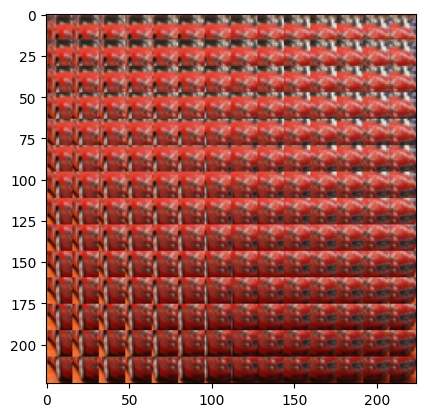

In [9]:
m = torchvision.transforms.ToPILImage()(trainset[5][0])
plt.imshow(m)
'''
for i in range(4):
    ne = np.array(m)[(i*4)+0:(i*4)+4,4:8]
    plt.imshow(ne)
    im = Image.fromarray(ne)
    im.save("32_1_"+str(i)+".jpg")
    '''


'''
ne = np.array(m)

ne1 = np.vstack((ne[0:16],ne[2:18],ne[3:19],ne[4:20],ne[5:21],ne[6:22],ne[7:23],ne[8:24],ne[9:25],ne[10:26],ne[11:27],ne[12:28],ne[13:29],ne[15:31]))
ne2 = np.hstack((ne1[:,0:16],ne1[:,2:18],ne1[:,3:19],ne1[:,4:20],ne1[:,5:21],ne1[:,6:22],ne1[:,7:23],ne1[:,8:24],ne1[:,9:25],ne1[:,10:26],ne1[:,11:27],ne1[:,12:28],ne1[:,13:29],ne1[:,15:31]))
print(ne2.shape)
plt.imshow(ne2)
'''


In [10]:
net = torch.load("checkpoint/vit_base_patch16_224.pth")
net.head = torch.nn.Linear(net.head.in_features,out_features=10,bias=True)
net = net.train().to(device=DEVICE, dtype=DTYPE)
print(net)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=F

In [11]:


optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

loss_func = torch.nn.CrossEntropyLoss()

In [12]:
def tran(epoch):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    scheduler.step()
    print('[%d] loss: %.3f' % (epoch + 1, running_loss))

In [13]:
def test():
    net.eval()
    all_counter=0
    correct_counter=0
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        out = net(inputs)
        out = out.detach().cpu().argmax(1)
        t = labels.cpu()
        for m in range(len(t)):
            all_counter += 1
            if t[m] == out[m]:
                correct_counter += 1

    print(correct_counter, all_counter, correct_counter / all_counter)
    return (correct_counter / all_counter)

In [14]:
correctRate = 0
for i in range(epochs):
    tran(i)
    r = test()
    if(r > correctRate):
        correctRate = r
        print("best: ", r , " in NO: ", i)
        torch.save(net.cpu(),"checkpoint/trans_vit2.pth")
        net = net.to(DEVICE)

[1] loss: 1544.156
2643 10000 0.2643
best:  0.2643  in NO:  0


KeyboardInterrupt: 